# __Create wells and tunnels__

### Problem statement

DFN.lab can operate with wells and tunnels to be used for various analyses (e.g. intersections between the DFN and the considered object) or to apply some boundary conditions.

<center>
<div>
<img src="https://gitlab.com/fractorylab/dfnlab/-/raw/master/Tutorials/img/well_tunnel.png" width="400"/>
</div>
<br>
Wells and tunnels
</center>

### What will you learn ?
- Create a well
- Create a cylindrical tunnel
- Create a tunnel from a file (STL format)

### DFN.Lab model

Wells and tunnels are named "geometries". They must be included into the system to perform connectivity analysis or simulation of physical processes.

The required modules are __System__ and __Domains__.

In [1]:
import dfnlab.System as sys
import dfnlab.Domains as dom

--------------------------------

### Create system
We first need to create the system.

In [2]:
system = sys.System()

### Create domain
Then we create a domain (the model volume) and assign it to the system

In [3]:
domain = dom.Domain()
domain.buildParallelepiped([0, 0, 0], 1.)
system.setDomain(domain)

### Create wells

Here we create two linear and parallel wells crossing the domain.

In [4]:
positionWell1Begin = [-0.25,0.,0.5]
positionWell1End = [-0.25,0.,-0.5]
well1= dom.Well1D(point1=positionWell1Begin, point2=positionWell1End)    
system.addGeometry(well1)

positionWell2Begin = [0.25,0.,0.5]
positionWell2End = [0.25,0.,-0.5]
well2= dom.Well1D(point1=positionWell2Begin, point2=positionWell2End)
system.addGeometry(well2)

We visualise the wells.

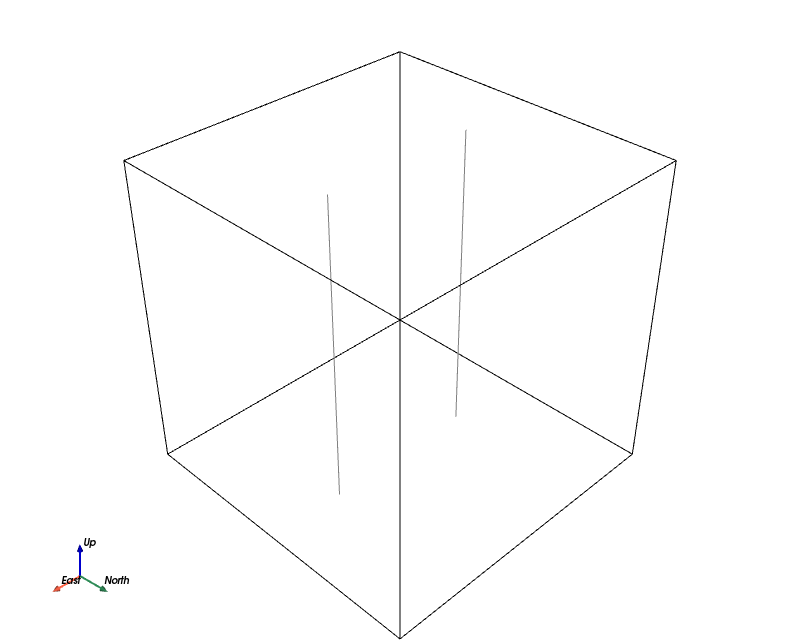

In [5]:
from sources.functions import plot_domain_and_geometries
plot_domain_and_geometries(system)

### Create a cylindrical tunnel
Straight, cylindrical tunnels can be created by defining a diameter, and the starting / ending points of the centerline.

In [6]:
positionTunnel1Begin = [0.,0.-0.5,0]
positionTunnel1End = [0.,0.5,0]
tunnel1 = dom.Tunnel(position1=positionTunnel1Begin, position2=positionTunnel1End, closed=False, diameter=0.1, index=1)
system.addGeometry(tunnel1)

Visualisation.

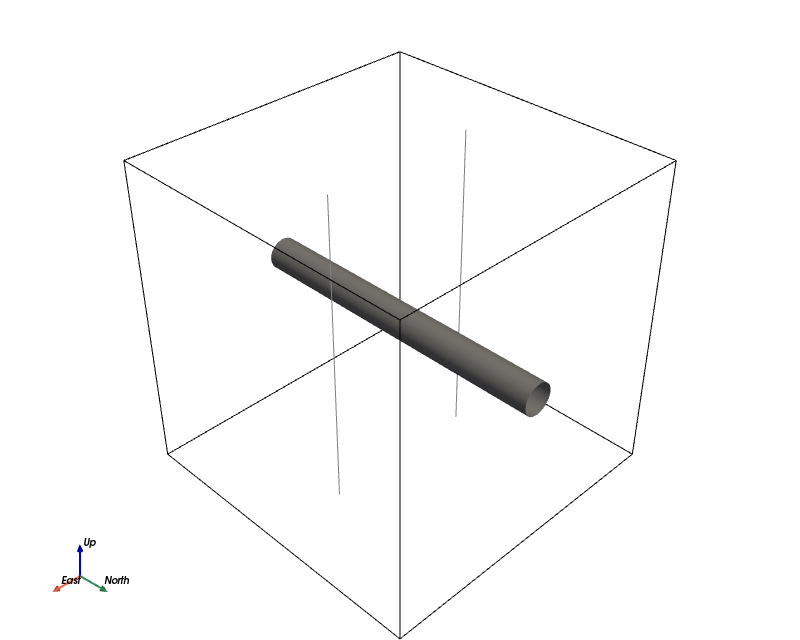

In [7]:
from sources.functions import plot_domain_and_geometries
plot_domain_and_geometries(system)

### Create tunnels from geometry files
You can also create tunnels with complex shapes from STL geometry files.

In [8]:
import dfnlab.Geometry as geom

stlReader = geom.STLReader("./sources/tunnel_etienne.stl") 
tunnel2 = dom.Tunnel(stlReader.getSurface())
system.addGeometry(tunnel2)

Visualisation.

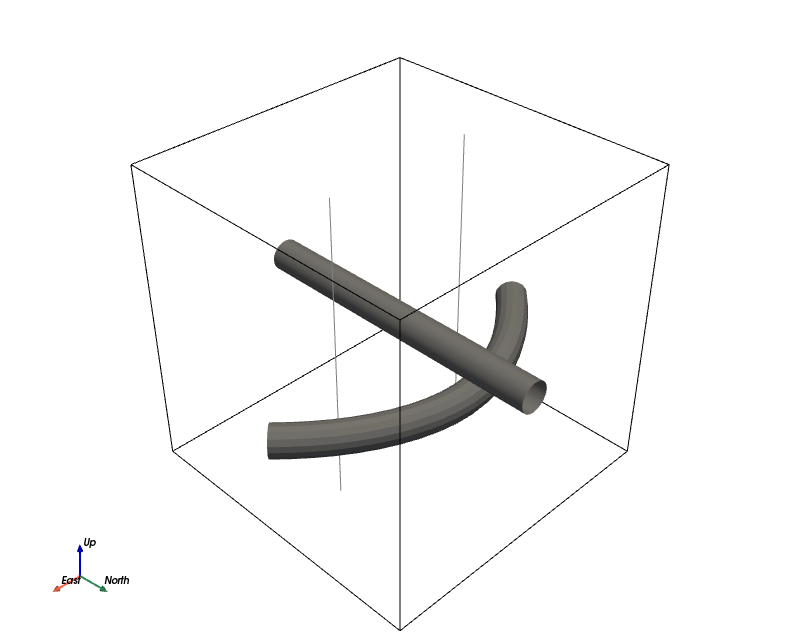

In [9]:
from sources.functions import plot_domain_and_geometries
plot_domain_and_geometries(system)